# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Jake Roll</p>
### <p style="text-align: right;"> &#9989; Put your _GitHub username_ here: JakeRoll04</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [31]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland', 'Ontario'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Middle East', 'Afghanistan', 'Ural'],
        'Scandinavia': ['Ukraine', 'Northern Europe', 'Great Britain', 'Iceland'],
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Egypt', 'North Africa', 'Middle East'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Ukraine', 'Western Europe', 'Southern Europe']
    },
    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo'],
        'Egypt': ['Southern Europe', 'North Africa', 'East Africa', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Irkutsk', 'Kamchatka'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Kamchatka': ['Alaska', 'Yakutsk', 'Irkutsk', 'Mongolia', 'Japan'],
        'Mongolia': ['Siberia', 'Irkutsk', 'Kamchatka', 'Japan', 'China'],
        'Japan': ['Mongolia', 'Kamchatka'],
        'China': ['Ural', 'Siberia', 'Mongolia', 'India', 'SIAM', 'Afghanistan'],
        'India': ['China', 'Afghanistan', 'Middle East', 'SIAM'],
        'SIAM': ['India', 'China', 'Indonesia'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'India', 'Middle East'],
        'Middle East': ['Southern Europe', 'Ukraine', 'Afghanistan', 'India', 'East Africa', 'Egypt']
    },
    'Australia': {
        'Indonesia': ['SIAM', 'New Guinea', 'Western Australia', 'Eastern Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia', ],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['New Guinea', 'Western Australia']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [32]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Your code here
    G = nx.Graph()

    for continent, territory in territories.items(): # Looping through the risk_territory dictionary.
        for terr, nodes in territory.items():
            G.add_node(terr, continent=continent) # Match Continents to each node.
            for neighbor in nodes:
                if neighbor not in G:
                    G.add_node(neighbor, continent=None) 
                G.add_edge(terr, neighbor)
    return G

# Create the graph
G = create_risk_graph(risk_territories)


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

/tmp/ipykernel_3538826/2870955709.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {continent: plt.cm.get_cmap('tab20')(i / len(unique_continents)) for i, continent in enumerate(unique_continents)}


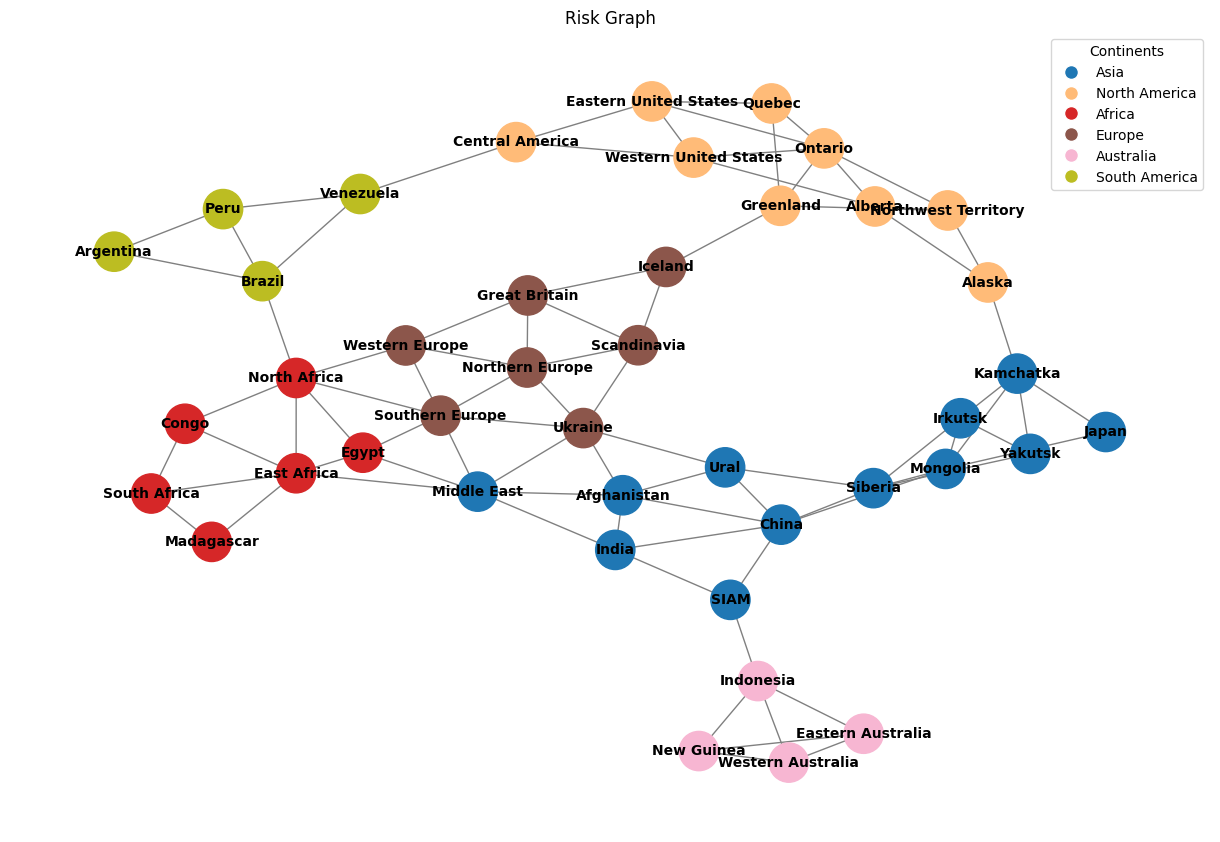

In [37]:
# Help with nx syntax + usability and different loops from chatgpt.com.

def visualize_risk_graph(G, layout):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    # Your code here
    # Layout options (5 of them).
    layouts = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout
    }
    
    pos = layouts.get(layout, nx.spring_layout)(G) # Get certain layout.
    # Color nodes by continents, by getting all unique continents through loop.
    continents = {node: G.nodes[node].get('continent', 'Unknown') for node in G.nodes()}
    unique_continents = list(set(continents.values()))
    color_map = {continent: plt.cm.get_cmap('tab20')(i / len(unique_continents)) for i, continent in enumerate(unique_continents)}
    node_colors = [color_map[continents[node]] for node in G.nodes()]
    # Plot dimensions and attributes, making font and node size bigger, etc.
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=800, font_size=10, node_color=node_colors, edge_color='gray', linewidths=1, font_weight='bold')
    # Creating legend for Continent colors.
    legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[c], markersize=10, label=c) for c in unique_continents]
    plt.legend(handles=legend_patches, title="Continents")
    plt.title("Risk Graph")
    plt.show()

# Visualize the graph
visualize_risk_graph(G, layout = 'kamada_kawai')


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎ 1. 'kamada_kawai' seems to be the best layout for this visualization because it plots it just like continents on a map. It provides the best clarity and organization for plotting continents. Other layouts were placed in a circle and other confusing settings for this type of graphic.  

2. The Kamada Kawai method inserts a spring between all pairs of of vertices.  The length of the spring is set to be the same as the graph distance between vertices. This means that edges with a large weight will be longer. Source: https://stats.stackexchange.com/questions/346862/kamada-kawai-vs-fruchterman-reingold.

3. "continents = {node: G.nodes[node].get('continent', 'Unknown') for node in G.nodes()}
node_colors = [color_map[continents[node]] for node in G.nodes()]" is the code that was used to assign the color of each node based on its continent.  The first part of the code creates a dictionary where each node is assigned to its specific continent. If a node does not have a continent, it defaults to "Unknown", but that should not be a problem here.  Color_map loops through each continent and assigns a color for each unique continent.  node_colors then goes through the unique continents and gets a color corresponding to its' continent.

4. To create the legend, the code that was used was "legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[c], markersize=10, label=c) for c in unique_continents]
plt.legend(handles=legend_patches, title="Continents")".  plt.Line2D([0], [0] creates an invisible line since no line needs to be plotted for the legend.  Line2D objects act as legend markers. Then unique continents are looped through to ensure the label and marker face color match the continents.

5. The code used for the colormap was "color_map = {continent: plt.cm.get_cmap('tab20')(i / len(unique_continents)) for i, continent in enumerate(unique_continents)}
    node_colors = [color_map[continents[node]] for node in G.nodes()]" The color map was plt.cm.get_cmap('tab20') and 'tab20' is the colormap which contains 20 distinct colors, then it loops through the list of unique continents and assigns each a color which then corresponds to each of its' nodes.

6. To set the node size and font size in the visualization, the code "nx.draw(G, pos, with_labels=True, node_size=800, font_size=10, node_color=node_colors, edge_color='gray', linewidths=1, font_weight='bold')" was used.  Both node_size and font_size are parameters for nx.draw, which made it easy to change them and make them bigger than the default value.

7. The labels for the nodes were printed using the code "nx.draw(G, pos, with_labels=True, node_size=800, font_size=10, node_color=node_colors, edge_color='gray', linewidths=1, font_weight='bold')" once again. "with_labels = True" printed the labels on each node in the visualization, and was also a parameter for nx.draw. 

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [38]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University